In [ ]:
# mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier

In [ ]:
# reading the training set
df_train = pd.read_csv('/content/drive/MyDrive/FND_Kannada/data/v2/train.csv')
df_train.head()

,news,source,label
0,ಈ ವ್ಯಕ್ತಿ ಪ್ರೌಢಶಾಲೆಯಲ್ಲಿ 26 ಬಾರಿ ಫೇಲ್ ಆಗಿದ್ದಾನೆ,oneindia,0
1,ಸರ್ಕಾರದ ಜೊತೆ ಉದ್ಧವ್ ಠಾಕ್ರೆಯ ಪಕ್ಷವನ್ನೂ ವಶಪಡಿಸ್ಕ...,asianet,1
2,ಹುಲಿ ಸಂರಕ್ಷಿತ ಪ್ರದೇಶ ಘೋಷಣೆ ಸಿಎಂ ನಿರ್ಧಾರಕ್ಕೆ ಉಮ...,prajavani,1
3,108 ಗಂಟೆಯಲ್ಲಿ 75 ಕಿಮೀ ರಸ್ತೆ ನಿರ್ಮಾಣದ ಗುರಿ ಗಿನ್...,asianet,1
4,ಬಾಳಾಠಾಕ್ರೆ ತಿಲಕ ಇಡುತ್ತಿರುವುದು ಏಕನಾಥ್ ಶಿಂಧೆಗಲ್...,asianet,0


In [ ]:
# reading the testing set
df_test = pd.read_csv('/content/drive/MyDrive/FND_Kannada/data/v2/test.csv')
df_test.head()

,news,source,label
0,ನಿರಂತರ ಮಳೆ: ಕೊಳೆತ ಉದ್ದು ಬೆಳೆ ...,prajavani,1
1,ಸಲಿಂಗ ಸಂಬಂಧ ವಿರೋಧಿಸಿದ್ದಕ್ಕೆ ಲಿಂಗ ಬದಲಿಸಿಕೊಂಡಳು,asianet,1
2,ನ್ಯೂಯಾರ್ಕ್ ಟೈಮ್ಸ್‌ ಮುಖಪುಟದಲ್ಲಿ ಮೋದಿ ಬಗ್ಗೆ ವರದ...,oneindia,0
3,ಡ್ರೋಣ್ ಬಾಯ್ ಪ್ರತಾಪ್‌ನನ್ನು ವಿಜ್ಞಾನಿಯಾಗಿ DRDOಗೆ ...,factly,0
4,"ಎಸ್ಎಂಕೆ, ನಾರಾಯಣ ಮೂರ್ತಿ, ಪ್ರಕಾಶ್ ಪಡುಕೋಣೆಗೆ ಕೆಂಪ...",asianet,1


In [ ]:
# removing the null rows
df_train = df_train.dropna()
df_test = df_test.dropna()

In [ ]:
# splitting the datasets into dependent and independent variables
x_train = df_train['news']
y_train = df_train['label']
x_test = df_test['news']
y_test = df_test['label']

In [ ]:
# converting the news headlines into word vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [ ]:
# creating an ensemble of Logistic Regression and Support Vector Machine models
models = [('lr', LogisticRegression()), ('svm', SVC(probability = True, kernel = 'rbf'))]

In [ ]:
# creating a soft voting classifier
ensemble = VotingClassifier(estimators = models, voting = 'soft')
ensemble.fit(tfidf_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [ ]:
# predicting the headlines in the testing set as true or fake
y_pred = ensemble.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 76.0%


In [ ]:
# printing the classification report of the ensemble model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.48      0.62       200
           1       0.73      0.94      0.83       300

    accuracy                           0.76       500
   macro avg       0.79      0.71      0.72       500
weighted avg       0.78      0.76      0.74       500



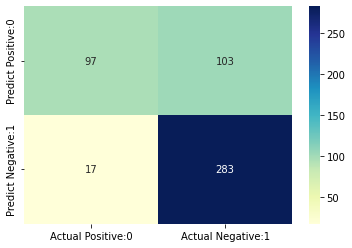

In [ ]:
# displaying the confusion matrix for the ensemble model
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:0', 'Actual Negative:1'], index = ['Predict Positive:0', 'Predict Negative:1'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')